**1. Importing libraries.**

In [ ]:
import pandas as pd
import numpy as np                    
import matplotlib.pyplot as plt               


**2. Reading the train file and flattening it.**

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

x_train.shape
x_test.shape

170500096/170498071 [==============================] - 2s 0us/step


(10000, 32, 32, 3)

**3.Normalizing the data.**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255


**4.Building the MLP model.**

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
# Building the model
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
# printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

**5.Compiling the model.**

In [ ]:

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


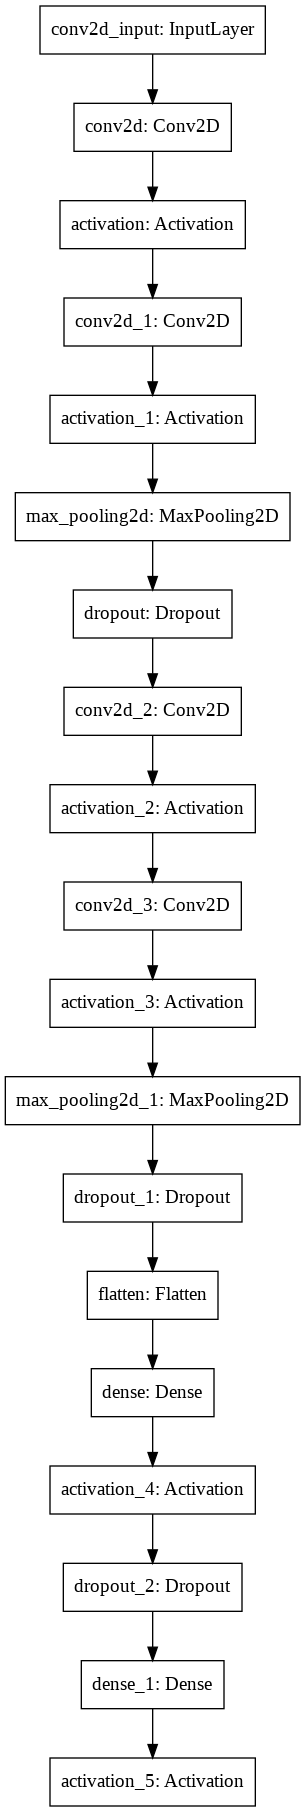

In [ ]:
# plotting the model


from tensorflow.keras.utils import plot_model
plot_model(model)

**6.Training the model.**

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)
history=model.fit(x_train, y_train, epochs=100,callbacks=[es_callback],validation_split=0.2,batch_size=32)


Epoch 1/100
1250/1250 [==============================] - 196s 157ms/step - loss: 1.3526 - accuracy: 0.5169 - val_loss: 1.2518 - val_accuracy: 0.5591
Epoch 2/100
1250/1250 [==============================] - 198s 158ms/step - loss: 1.2727 - accuracy: 0.5462 - val_loss: 1.1769 - val_accuracy: 0.5924
Epoch 3/100
1250/1250 [==============================] - 202s 161ms/step - loss: 1.2050 - accuracy: 0.5722 - val_loss: 1.1247 - val_accuracy: 0.6041
Epoch 4/100
1250/1250 [==============================] - 197s 158ms/step - loss: 1.1484 - accuracy: 0.5950 - val_loss: 1.0656 - val_accuracy: 0.6300
Epoch 5/100
1250/1250 [==============================] - 196s 157ms/step - loss: 1.0979 - accuracy: 0.6117 - val_loss: 1.0352 - val_accuracy: 0.6401
Epoch 6/100
1250/1250 [==============================] - 201s 161ms/step - loss: 1.0521 - accuracy: 0.6305 - val_loss: 0.9842 - val_accuracy: 0.6568
Epoch 7/100
1250/1250 [==============================] - 198s 159ms/step - loss: 1.0174 - accuracy: 0.6441

**6.Evaluating the model.**

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 11s 36ms/step - loss: 0.7253 - accuracy: 0.7509


[0.7252649664878845, 0.7508999705314636]

**7.Model accuracy**

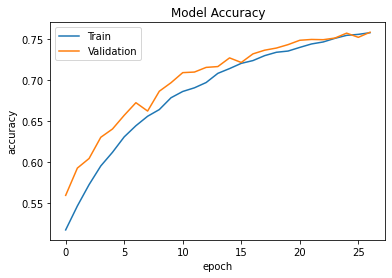

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**8.Model loss**

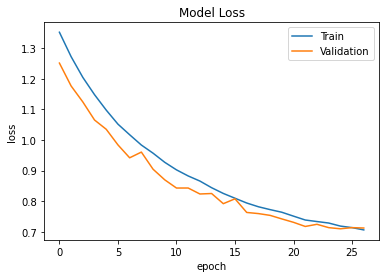

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**9.Running the model on new data**

In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
test_data = test_data.to_numpy()
test_data = test_data.reshape(2000,32,32,3)


In [ ]:
predictions = model.predict_classes(test_data)

In [ ]:
model.evaluate(test_data, predictions)

63/63 [==============================] - 2s 35ms/step - loss: 0.0022 - accuracy: 1.0000


[0.0021882886067032814, 1.0]

**10.Predictions**

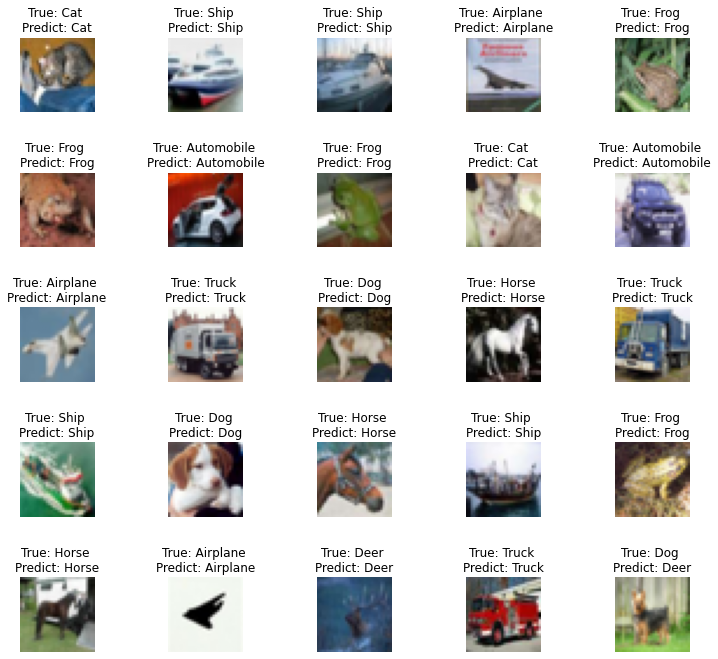

In [ ]:
pred = model.predict(x_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.array(y_test)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i][0]], labels[Y_pred_classes[i]]))    
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**11.Saving the prediction files**

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>